# 🔮 Importaciones necesarias para el proyecto

In [98]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

ERROR! Session/line number was not unique in database. History logging moved to new session 110


In [36]:
print(f"Versión de OpenCV: {cv2.__version__}")
print(f"Versión de Numpy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Version de Sklearn: {sk.__version__}")
print(f"Versión de Matplotlib.pyplot: {mpl.__version__}")

Versión de OpenCV: 4.8.1
Versión de Numpy: 1.21.5
Versión de Pandas: 1.3.5
Versión de TensorFlow: 2.1.0
Version de Sklearn: 1.0.2
Versión de Matplotlib.pyplot: 3.5.3


In [37]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 📂 Configuraciones del path para lectura

In [38]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier


In [39]:
# Obtenemos la dirección actual del path donde se está ejecutando el Jupyter Notebook
cwd = os.getcwd()
# Nos movemos a la carpeta donde se encuentran las imágenes a testear
os.chdir(f"{cwd}/classifier_resized/")
# Verificamos que nos encontramos en el path correcto
print(os.getcwd())
principal_directory = os.getcwd()

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier_resized


In [40]:
# Listamos los archivos de la ruta
print(os.listdir())

['speeds', 'stops', 'trafficLights']


# 🧐 Lectura de imágenes

In [41]:
images = []
labels = []

i = 0
# Itera sobre las carpetas dentro del directorio principal
for folder in os.listdir(principal_directory):
    folder_path = os.path.join(principal_directory, folder)
    
    # Verifica si el elemento en el directorio es una carpeta
    if os.path.isdir(folder_path):
        
        # Etiqueta de la carpeta
        label = i
        
        # Itera sobre los archivos dentro de la carpeta
        for file in os.listdir(folder_path):
            archivo_path = os.path.join(folder_path, file)
            
            # Lee la imagen con OpenCV y la agrega a la lista
            image = cv2.imread(archivo_path)
            
            # Convertir la imagen al espacio de color RGB desde BGR (formato por defecto de OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Normaliza los valores de la imagen de 0 a 1
            normalized_img = image / 255.0
            images.append(normalized_img)
            labels.append(label)
            
    i += 1
            
# Crear un DataFrame a partir de las listas de imágenes y etiquetas
data = {'Images': images, 'Labels': labels}
df = pd.DataFrame(data)            
            
index = np.random.randint(0, len(images))
print("Pixeles de la imagen antes de la normalización: ", images[index][5][5] * 255)
print("Pixeles de la imagen después de la normalización: ", images[index][5][5])
print("-------------------------------------------------------------------------------")
print(len(images))
print(len(labels))

Pixeles de la imagen antes de la normalización:  [120. 136. 151.]
Pixeles de la imagen después de la normalización:  [0.47058824 0.53333333 0.59215686]
-------------------------------------------------------------------------------
531
531


In [42]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/classifier/")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier


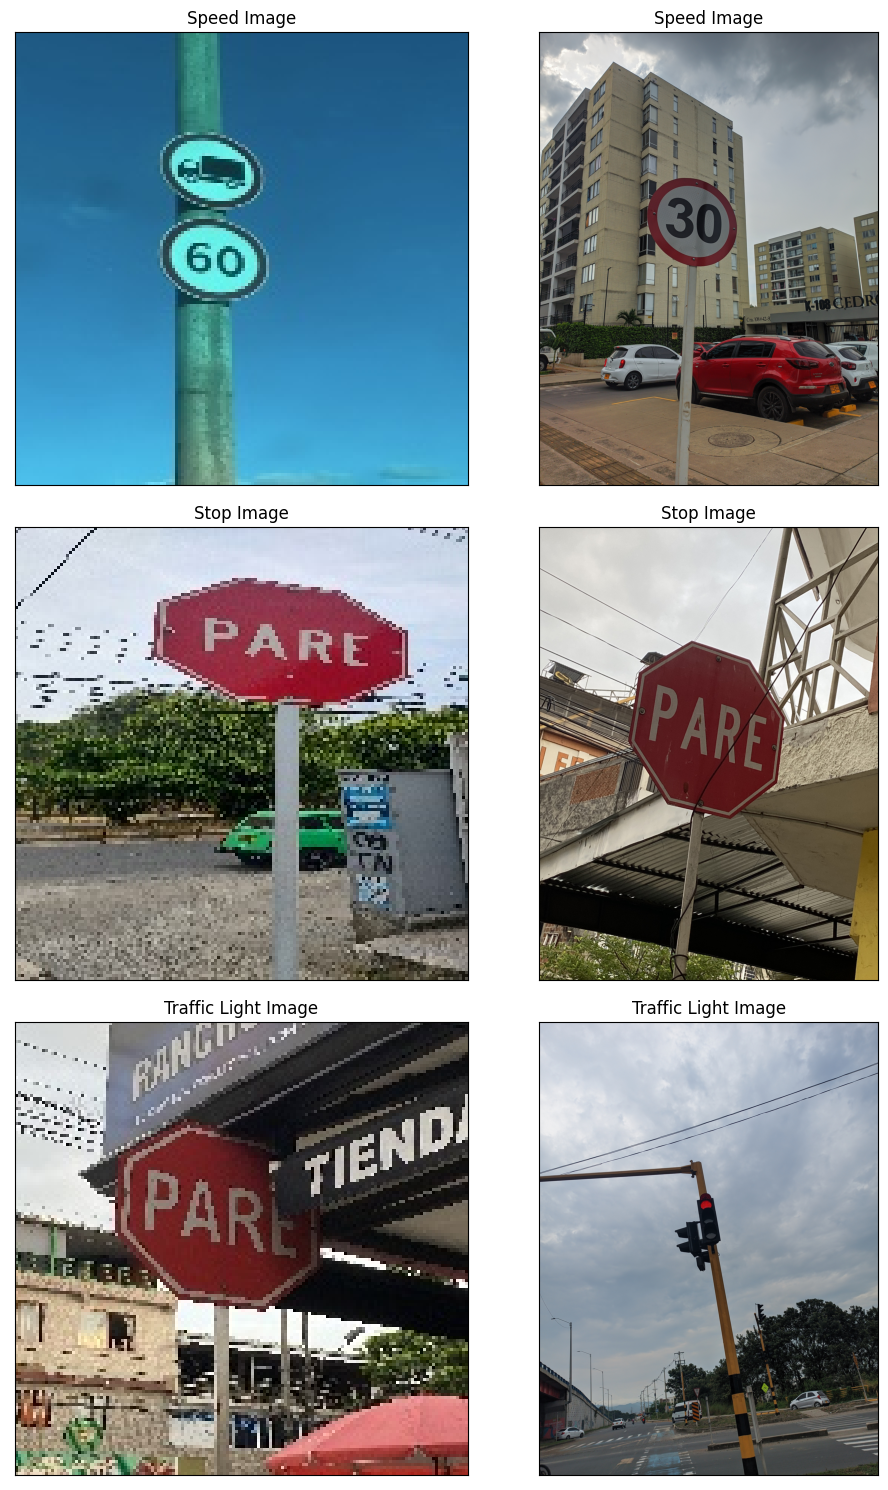

Index Speed: 2
Index Speed normal: 3
Index Stop: 215
Index Stop normal: 90
Index TrafficLight: 272
Index TrafficLight: 22


In [43]:
# Inicializa la figura
plt.figure(figsize=(10, 15))

indexSpeed = np.random.randint(0, 125)
plt.subplot(3, 2, 1), plt.imshow(images[indexSpeed])
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

image_speed = cv2.cvtColor(cv2.imread(f"speeds/Velocidad-{indexSpeed + 1}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 2), plt.imshow(image_speed)
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

indexStop = np.random.randint(125, 250)
plt.subplot(3, 2, 3), plt.imshow(images[indexStop])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

image_stop = cv2.cvtColor(cv2.imread(f"stops/Pare-{indexStop - 125}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 4), plt.imshow(image_stop)
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

indexTrafficLight = np.random.randint(250, 375)
plt.subplot(3, 2, 5), plt.imshow(images[indexTrafficLight])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

image_trafficlight = cv2.cvtColor(cv2.imread(f"trafficLights/Semaforo-{indexTrafficLight - 250}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 6), plt.imshow(image_trafficlight)
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

print(f"Index Speed: {indexSpeed}")
print(f"Index Speed normal: {indexSpeed + 1}")
print(f"Index Stop: {indexStop}")
print(f"Index Stop normal: {indexStop - 125}")
print(f"Index TrafficLight: {indexTrafficLight}")
print(f"Index TrafficLight: {indexTrafficLight - 250}")

In [44]:
df.head(-1)

,Images,Labels
0,"[[[0.7333333333333333, 0.7686274509803922, 0.7...",0
1,"[[[0.6980392156862745, 0.7254901960784313, 0.7...",0
2,"[[[0.12156862745098039, 0.35294117647058826, 0...",0
3,"[[[0.5647058823529412, 0.6039215686274509, 0.6...",0
4,"[[[0.11372549019607843, 0.3568627450980392, 0....",0
...,...,...
525,"[[[0.7764705882352941, 0.8, 0.8627450980392157...",2
526,"[[[0.6274509803921569, 0.6745098039215687, 0.7...",2
527,"[[[0.7333333333333333, 0.7647058823529411, 0.8...",2
528,"[[[0.4980392156862745, 0.5450980392156862, 0.6...",2


In [45]:
x = np.array(df.Images.tolist())
y = np.array(df.Labels.tolist())
y = y.reshape((y.shape[0],-1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50, stratify=y)

num_classes = 3
y_train = to_categorical(y_train, num_classes) 
y_test = to_categorical(y_test, num_classes)

print(f"X_Train: {x_train.shape}")
print(f"X_Test: {x_test.shape}")
print(f"Y_Train: {y_train.shape}")
print(f"Y_Test: {y_test.shape}")

X_Train: (424, 150, 150, 3)
X_Test: (107, 150, 150, 3)
Y_Train: (424, 3)
Y_Test: (107, 3)


## Build the model

### Model taked from: [Kaggle](https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn)

In [82]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer= l2(0.1), input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer= l2(0.1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', kernel_regularizer= l2(0.01)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', kernel_regularizer= l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer= l2(0.001)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer= l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(150, activation='relu', kernel_regularizer= l2(0.1)))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 146, 146, 8)       608       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 142, 142, 8)       1608      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 71, 71, 8)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 71, 71, 8)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 67, 67, 16)        3216      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 63, 63, 16)        6416      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 31, 31, 16)      

In [83]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/models/")
model_directory = os.getcwd()
print(os.getcwd())
# Listamos los archivos de la ruta
print(os.listdir())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\models
['ModelV1.h5']


In [84]:
# Callbacks
checkpoint = ModelCheckpoint(
                filepath = 'ModelV1.h5',
                monitor = 'accuracy',
                mode = 'max',
                save_best_only = True,
                # save_weights_only = True
            )
stopping = EarlyStopping(
            monitor = 'val_accuracy',
            patience = 50,
            mode = 'max',
            restore_best_weights=True
        )

In [85]:
# Training the Model
start = time.time()
with tf.device('/GPU:0'):
    history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[checkpoint, stopping])
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

Train on 424 samples, validate on 107 samples
Epoch 1/400
424/424 [==============================] - 1s 3ms/sample - loss: 19.5299 - accuracy: 0.3302 - val_loss: 8.5082 - val_accuracy: 0.3925
Epoch 2/400
424/424 [==============================] - 0s 1ms/sample - loss: 5.0411 - accuracy: 0.3443 - val_loss: 2.5767 - val_accuracy: 0.3738
Epoch 3/400
424/424 [==============================] - 0s 1ms/sample - loss: 2.1070 - accuracy: 0.3774 - val_loss: 1.8059 - val_accuracy: 0.3738
Epoch 4/400
424/424 [==============================] - 0s 989us/sample - loss: 1.6993 - accuracy: 0.3797 - val_loss: 1.5692 - val_accuracy: 0.3738
Epoch 5/400
424/424 [==============================] - 0s 895us/sample - loss: 1.4861 - accuracy: 0.3774 - val_loss: 1.3975 - val_accuracy: 0.3738
Epoch 6/400
424/424 [==============================] - 0s 932us/sample - loss: 1.3444 - accuracy: 0.3774 - val_loss: 1.2855 - val_accuracy: 0.3738
Epoch 7/400
424/424 [==============================] - 0s 1ms/sample - loss: 

In [99]:
# model = load_model('ModelV1.h5')

loss, acc = model.evaluate(x_test,y_test, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

save_model(model, "best_modelV1.h5")

107/107 [==============================] - 0s 3ms/sample - loss: 0.8324 - accuracy: 0.7850
Loss:0.8323836426868617 - Accuracy:0.7850467562675476


In [ ]:
# model1 = load_model("best_modelV1.h5")
# model1 = load_model(f"{model_directory}/best_modelV1.h5")

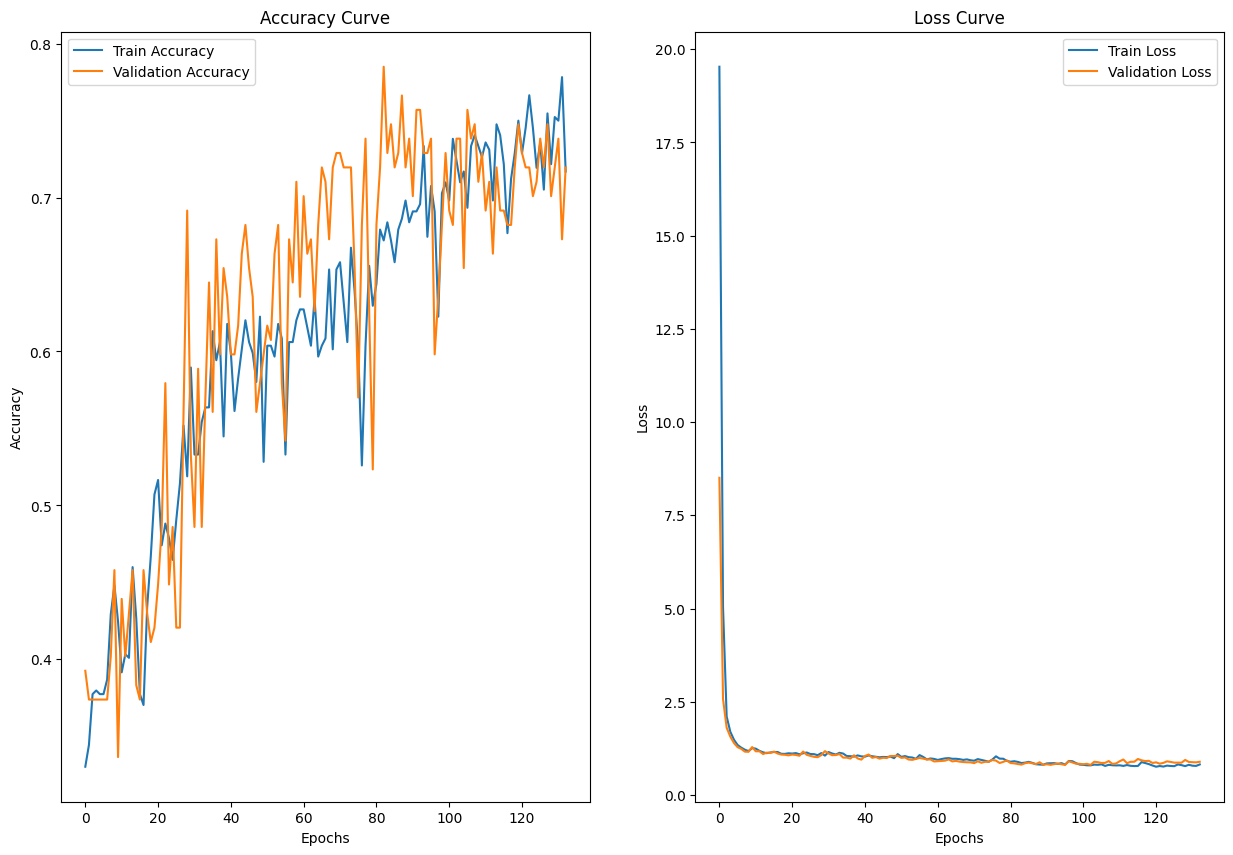

In [87]:
plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

               precision    recall  f1-score   support

        Speed       0.73      0.75      0.74        40
         Stop       0.93      0.82      0.87        34
Traffic-Light       0.72      0.79      0.75        33

     accuracy                           0.79       107
    macro avg       0.80      0.79      0.79       107
 weighted avg       0.79      0.79      0.79       107

------------------------------------------------------------------------------


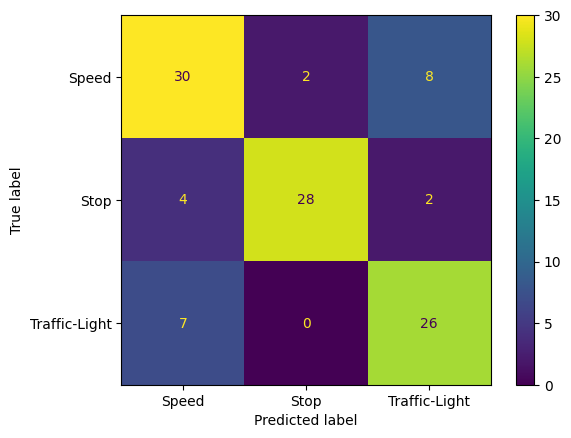

In [88]:
# Matriz de confusion
y_pred = model.predict(x_test)

# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define las etiquetas de clase correspondientes a tus clases
clases = ["Speed", "Stop", "Traffic-Light"]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(clases)))

print(classification_report(y_test_labels, y_pred_labels, target_names = clases))

print("------------------------------------------------------------------------------")

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()
plt.show()

In [89]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/model_test/")
test_directory = os.getcwd()
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\model_test


In [90]:
def convert_image(path):
    img = cv2.imread(path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img_color, (150, 150))
    normalized_img = resized_img / 255.0
    return normalized_img

def reshape_image(img):
    good_image = np.reshape(img, (1, 150, 150, 3))
    return good_image

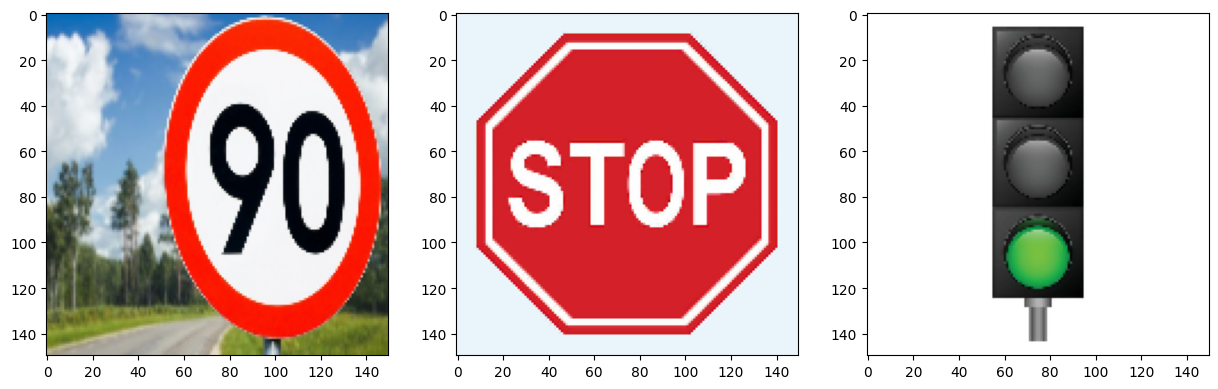

In [91]:
# Lee la imagen
image_Test_Speed = convert_image(f"{test_directory}/speed-1.jpg")
image_Test_Stop = convert_image(f"{test_directory}/stop-1.jpg")
image_Test_Traffic_Light = convert_image(f"{test_directory}/trafficlight-1.jpg")

plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(1, 3, 1), plt.imshow(image_Test_Speed)
plt.subplot(1, 3, 2), plt.imshow(image_Test_Stop)
plt.subplot(1, 3, 3), plt.imshow(image_Test_Traffic_Light)

plt.show()

image_Test_Speed = reshape_image(image_Test_Speed)
image_Test_Stop = reshape_image(image_Test_Stop)
image_Test_Traffic_Light = reshape_image(image_Test_Traffic_Light)

In [93]:
start = time.time()
y_pred_speed = model.predict(image_Test_Speed)
print("SPEED == 0")
print(y_pred_speed.argmax())
finish = time.time()
print(f"Speed se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

start = time.time()
print("STOP == 1")
y_pred_stop = model.predict(image_Test_Stop)
print(y_pred_stop.argmax())
finish = time.time()
print(f"Stop se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

start = time.time()
print("TRAFFIC LIGHT == 2")
y_pred_trafficlight = model.predict(image_Test_Traffic_Light)
print(y_pred_trafficlight.argmax())
finish = time.time()
print(f"Traffic LLight se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

SPEED == 0
0
Speed se demoró: 0.020043373107910156 segundos.
--------------------------------------------------------------------
STOP == 1
1
Stop se demoró: 0.017561674118041992 segundos.
--------------------------------------------------------------------
TRAFFIC LIGHT == 2
2
Traffic LLight se demoró: 0.01802849769592285 segundos.
--------------------------------------------------------------------
